In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
from Data.Data_Module import Data_Module
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from PIL import Image
import torch
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
from PIL import Image
from IPython.display import display, Math

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Loading Vocabulary

**Note: One needs to use the vocabulary json of the trained model 
and our paths come with corresponding vocabulary**

 - Path files and Vocabulary json are located in `Models_Parameters_Log` folder
 
- set the `load_vocabulary = True` parameter of Data_Module below

- set the `vocabulary_path = Path_to_json` parameter of Data_Module below

- make sure the vocabulary size mathches the original trained vocabulary size of 550 (if you are using our weights)



N.B. this needs to be improved

In [3]:
# Generate Data Module by uploading images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt

dataset = Data_Module(stage = 'fit',
                 set_max_label_length = 256,
                 number_png_images_to_use_in_dataset=250*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.99,
                   
                load_vocabulary = True,
                vocabulary_path = 'Models_Parameters_Log/258_Test_run.json',


                 batch_size = 128,
                num_workers = 8,
                data_on_gpu = True,
                )


# Generates DataFrame and vocabulary, tokezniers etc
#dataset.prepare_data()

# prepeares the dataloaders with transformations and splits train/val
# dataset.setup(stage = 'fit')

In [5]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)

Vocabulary size: 550 
Max label length: 258 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [6]:
# Initiate the model
model = ResNetTransformer(dataset=dataset).to(dev)

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
# Load the weights

model.load_state_dict(torch.load(("Models_Parameters_Log/258_Test_run.pth"), map_location=torch.device('cpu')))


<All keys matched successfully>

### Inference Tests on various images


In [9]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = dataset.vocabulary
    inverse_mapping =dataset.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        
        letter = inverse_mapping[number.item()]
        s= s +" " + str(letter)
    return s

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1414: UserWarning: The image is already gray.
  warnings.warn("The image is already gray.")


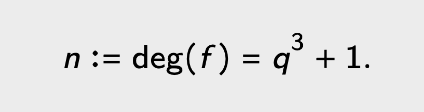

None

Predicted formula:
 <S> n : = \mathrm { d e g } ( f ) \, = \, { q ^ { 3 } } + 1 . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> 

<IPython.core.display.Math object>

None


In [10]:
### ALB
my_image_path= "Jupyter_Notebooks/test_photos/my_image.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))


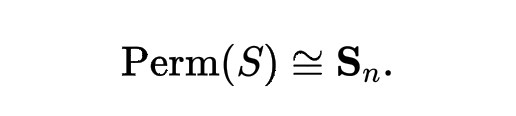

None

Predicted formula:
 <S> \mathrm { P e r m } ( S ) \cong { \bf S } _ { n } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P

<IPython.core.display.Math object>

None


In [9]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

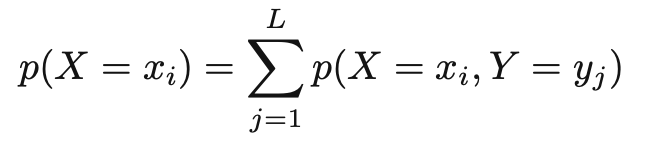

None

Predicted formula:
 <S> p ( X = x _ { i } ) = \sum _ { j = 1 } ^ { L } p ( X = x _ { i } , Y = y _ { j } ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [10]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

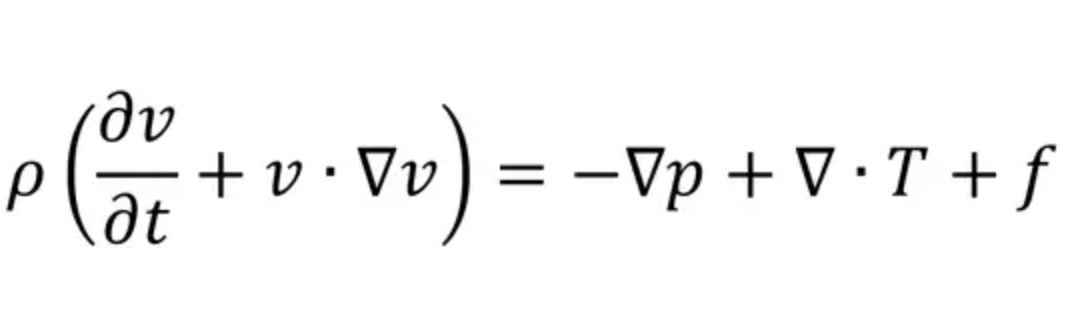

None

Predicted formula:
 <S> \rho \left( \frac { \partial v } { \partial t } + v \cdot \nabla v \right) = - \nabla p + \nabla \cdot T + f <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <

<IPython.core.display.Math object>

None


In [11]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_3.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

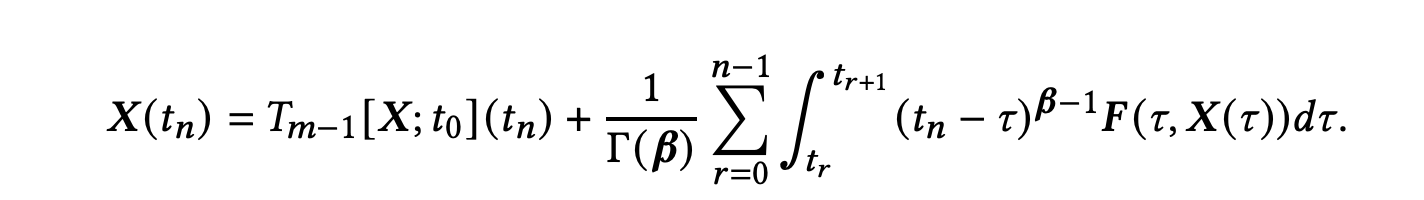

None

Predicted formula:
 <S> X ( t _ { n } ) = T _ { m - 1 } [ X ; t _ { 0 } ] ( t _ { n } ) + \frac { 1 } { \Gamma ( \rho ) } \sum _ { \ell = 0 } ^ { m - 1 } \int _ { \ell _ { r } } ^ { \ell _ { r k } } ( t _ { n } - \tau ) ^ { \rho - 1 } F ( \tau ; { \bf X } ( \tau ) ) d \tau . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [12]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_14.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

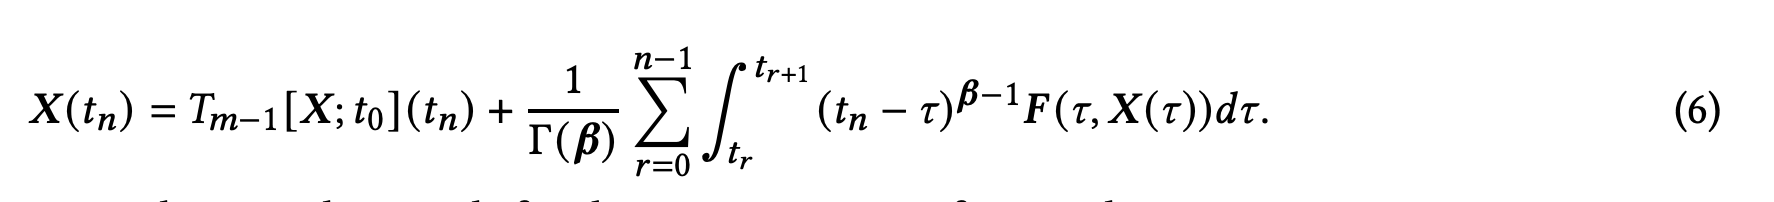

None

Predicted formula:
 <S> X ( t _ { n } ) = T _ { m - 1 } [ \chi _ { 3 } ; t _ { 0 } ] ( t _ { n } ) + \frac { 1 } { \Gamma ( \theta ) } \sum _ { r = 0 } ^ { n - 1 } \int _ { t r } ^ { \prime r _ { n } } ( t _ { n } - v ) ^ { \rho - 1 } P ( \tau ; X ( \tau ) ) d r _ { r } = - ( \theta ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [13]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_13.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

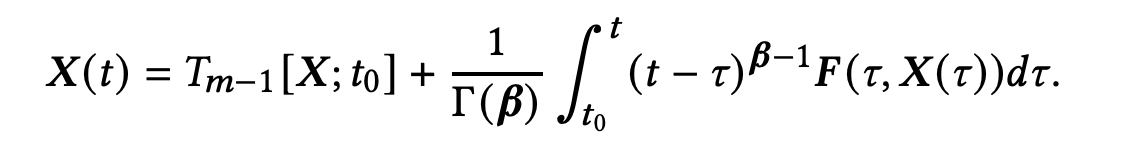

None

Predicted formula:
 <S> { \bf X } ( t ) = T _ { m - 1 } [ { \bf X } ; t _ { 0 } ] + \frac { 1 } { \Gamma ( \not \! B ) } \int _ { { \cal F } _ { 0 } } ^ { t } ( t - \tau ) ^ { \not \! B - 1 } F ( \tau , X ( \tau ) ) d \tau . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [14]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_15.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

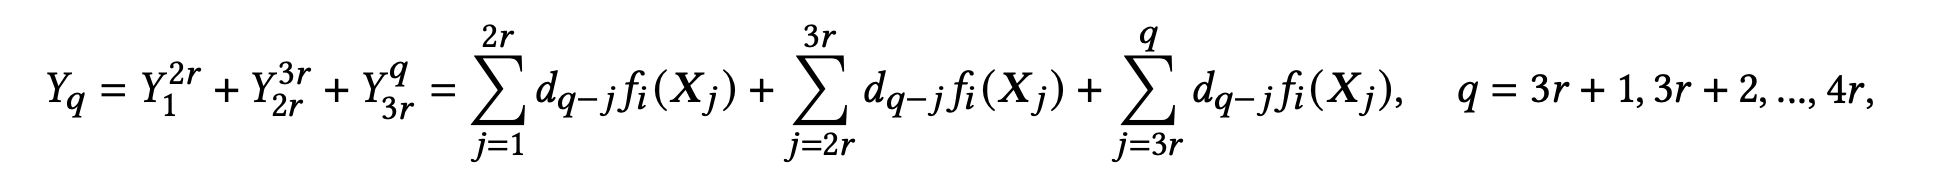

None

Predicted formula:
 <S> Y _ { q } = Y _ { 1 } ^ { 2 r } + Y _ { 2 r } ^ { 2 r + 1 _ { N } ^ { 2 r + 1 } = \sum _ { j = 1 } ^ { 2 r } d y _ { p + j } f ( X _ { j } ) + \sum _ { j = 2 r } ^ { 3 r } d y _ { q - j k } ( X _ { j } ) + \sum _ { j = 2 r } ^ { 2 } d y _ { r - j } f ( X _ { j } ) , \qquad q = 3 r + 1 , 3 r + 2 , 4 r , <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [15]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_10.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

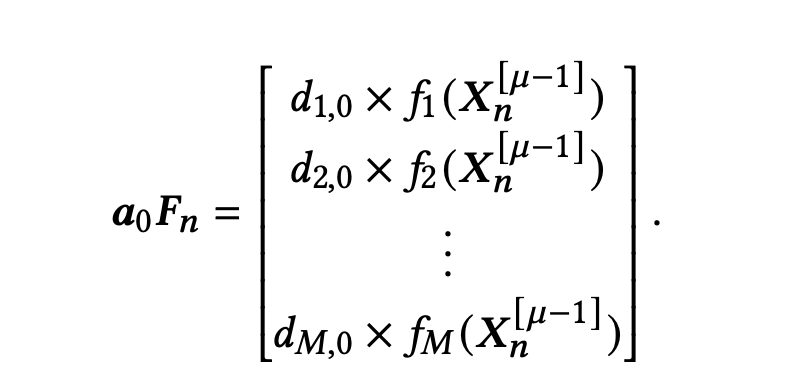

None

Predicted formula:
 <S> \begin{array} { c } { \sigma _ { 0 } F _ { k } = \left| \begin{array} { c } { d _ { 1 , 0 } \times 5 ( X _ { 1 , 0 } ^ { \mu } + 1 1 ) } \\ { d _ { 0 , 0 } \times K ( X _ { 1 \mu - 1 } ^ { \mu \nu - 1 } ) } \\ { d _ { 0 , 0 } \times K ( X _ { 1 } ^ { \mu \nu - 1 } ) } \\ \end{array} \right| . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [16]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_11.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

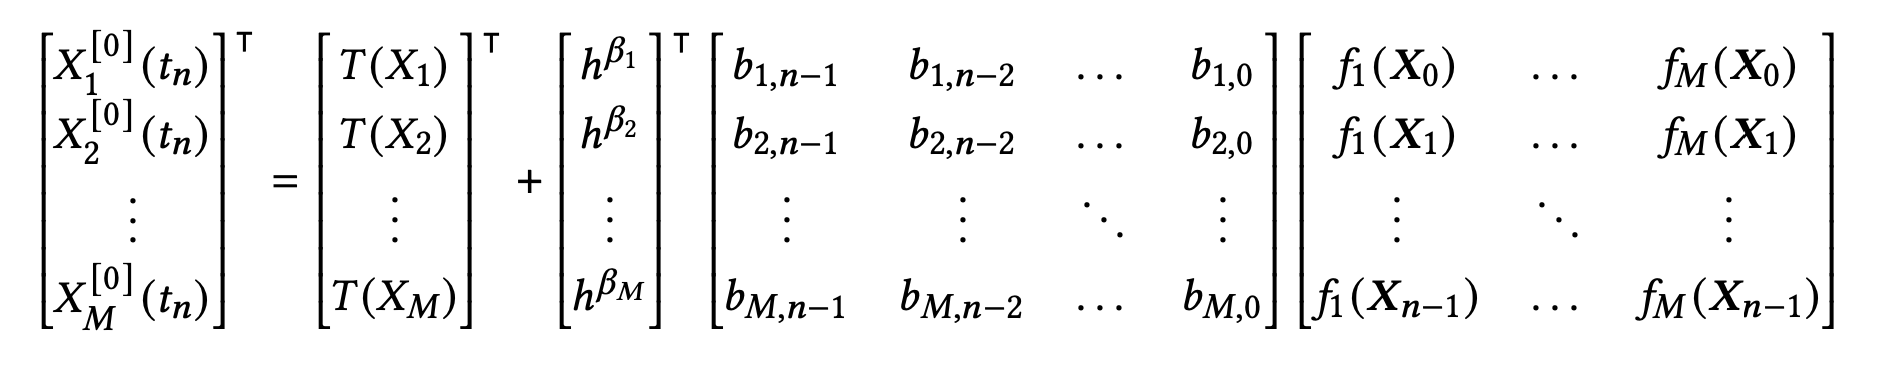

None

Predicted formula:
 <S> \left[ \begin{array} { c c c } { S _ { 0 } ^ { 0 0 } ( \alpha \beta ) } \\ { S _ { 0 } ^ { 0 0 } ( \alpha \beta ) } \\ { S _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ { S _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ \end{array} \right] ^ { r } \left[ \begin{array} { c c c } { f _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ { f _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ { f _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ { f _ { 0 } ^ { 0 } ( \alpha \beta ) } \\ \end{array} \right] ^ { r } \left[ \begin{array} { c c } { f _ { 0 } ^ { 0 } ( \alpha \beta ) } & { e _ { 0 } ^ { 0 } ( \alpha \beta ) } & { 0 } & { 0 } \\ { f _ { 0 } ^ { 0 } ( \alpha \beta _ { 0 } ) } & { 0 } \\ { f _ { 0 } ^ { 0 } ( \beta _ { 0 } ) } & { 0 } \\ \end{array} \right] <E> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [17]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_12.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

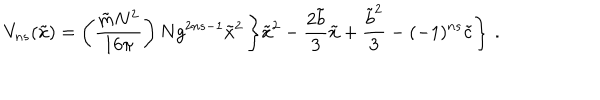

None

Predicted formula:
 <S> \chi _ { \mathrm { r o r } } ( \vec { \cal E } ) = ( \frac { \tilde { N } N ^ { \mu } } { | \Theta _ { \mathrm { r } } ^ { \prime } } ) \wedge \Lambda \Phi ^ { 2 \alpha - 1 } \vec { \cal E } ^ { 2 } } \Big \} \vec { \cal E } ^ { 2 } - \frac { 2 E } { 2 } \vec { \cal E } + \frac { \tilde { k } ^ { \mu } } { 3 } - ( - \eta ) ^ { \alpha \beta } c \Big \} \ . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [18]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_16.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

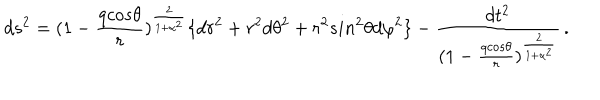

None

Predicted formula:
 <S> \Phi ^ { 2 } = \Omega - \frac { 7 \alpha \phi } { 8 } ) ^ { \frac { 1 } { 4 } } ( \xi \delta ^ { 2 } + V ^ { 2 } \phi \Phi ^ { 2 } + n ^ { 2 } g [ n ^ { 2 } \Theta \Phi ^ { 4 } \} - \frac { 8 t ^ { 2 } } { 2 } \sqrt { - \frac { 2 \pi \alpha \phi } { 2 } } ) ^ { 2 } + n ^ { 2 } } } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [19]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_17.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

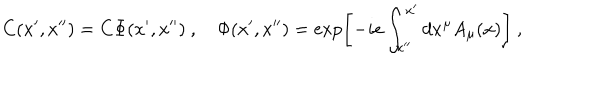

None

Predicted formula:
 <S> \zeta ( \zeta ^ { \prime } , \vec { \lambda } ^ { \prime } ) = \zeta \vec { \Phi } ( z _ { + } ^ { \prime } ) , \quad 9 ( \zeta _ { + } ^ { \prime } , \vec { \lambda } ^ { \prime } ) = e s p \left[ - i \omega \sum _ { X } ^ { < } \mathrm { d } \zeta ^ { \prime } A _ { \mu } ( \varphi ) \right] . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [20]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_18.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

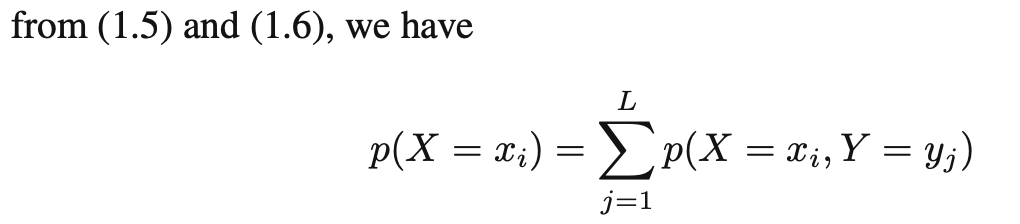

None

Predicted formula:
 <S> \begin{array} { c c } { \mathrm { f r o m ~ ( 1 , S ) ~ a n d ~ ( 1 , 6 ) , ~ w e ~ } } \\ { } & { } & { } \\ { } & { } & { } \\ { } & { } & { } \\ { } & { } & { } \\ { } & { } & { } \\ \end{array} p ( X - x _ { i } ) - \sum _ { j = 4 } ^ { L } p ( X - x _ { i } , Y - y _ { j } ) } \\ \end{array} <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [21]:
### Unseen before two lines of text with identation
# Model learns to use \begin{array}

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_2.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))